# Import Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, Nadam, AdamW, Lion
import tensorflow_hub as hub
from tensorflow.keras.preprocessing import image
import os, random

# Data Collection and Load

In [ ]:
%pip install gdown
!gdown --fuzzy "https://drive.google.com/file/d/1PdwPKo91TizcS6Lv_aB9SPhHxpP04bOS/view?usp=sharing"
!unzip 'Penyakit Retina Mata 3.zip'

Downloading...
From (original): https://drive.google.com/uc?id=1PdwPKo91TizcS6Lv_aB9SPhHxpP04bOS
From (redirected): https://drive.google.com/uc?id=1PdwPKo91TizcS6Lv_aB9SPhHxpP04bOS&confirm=t&uuid=290ca34c-64f8-4ac1-a453-2efbf5f6220a
To: /content/Penyakit Retina Mata 3.zip
100% 818M/818M [00:12<00:00, 67.0MB/s]
Archive:  Penyakit Retina Mata 3.zip
   creating: Penyakit Retina Mata 3/cataract/
  inflating: Penyakit Retina Mata 3/cataract/_0_4015166.jpg  
  inflating: Penyakit Retina Mata 3/cataract/_1_5346540.jpg  
  inflating: Penyakit Retina Mata 3/cataract/_1_7703314.jpg  
  inflating: Penyakit Retina Mata 3/cataract/_10_3215668.jpg  
  inflating: Penyakit Retina Mata 3/cataract/_100_334408.jpg  
  inflating: Penyakit Retina Mata 3/cataract/_101_5139882.jpg  
  inflating: Penyakit Retina Mata 3/cataract/_101_709333.jpg  
  inflating: Penyakit Retina Mata 3/cataract/_102_1024926.jpg  
  inflating: Penyakit Retina Mata 3/cataract/_102_3990401.jpg  
  inflating: Penyakit Retina Mata 3/ca

In [ ]:
data_directory = './Penyakit Retina Mata 3/'
training_set_1 = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    color_mode='rgb',
    batch_size=128,
    image_size=((224, 224)),
    shuffle=True,
    label_mode='categorical',
    seed=123,
    validation_split=0.3,
    subset='training'
)
validation_set_1 = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    color_mode='rgb',
    batch_size=128,
    image_size=((224, 224)),
    shuffle=True,
    label_mode='categorical',
    seed=123,
    validation_split=0.3,
    subset='validation'
)

Found 4180 files belonging to 4 classes.
Using 2926 files for training.
Found 4180 files belonging to 4 classes.
Using 1254 files for validation.


# Model

In [ ]:
augmentation_layers = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.4),
    tf.keras.layers.RandomZoom(0.2)
])

In [ ]:
get_mobilenet_v3_pretrained_model = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"
mobilenet_v3_pretrained_model = hub.KerasLayer(get_mobilenet_v3_pretrained_model, input_shape=(224, 224, 3), trainable=True)

## Model 1

In [ ]:
inputs_1 = tf.keras.Input(shape=(224, 224, 3))
x_1 = augmentation_layers(inputs_1)
x_1 = mobilenet_v3_pretrained_model(x_1)
x_1 = tf.keras.layers.BatchNormalization()(x_1)
x_1 = tf.keras.layers.Dropout(0.5)(x_1)
prediction_layer_1 = tf.keras.layers.Dense(4, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.05))
outputs_1 = prediction_layer_1(x_1)
model_1 = tf.keras.Model(inputs_1, outputs_1)

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              4226432   
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                             

## Compiled

In [ ]:
model_1.compile(optimizer=Lion(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

## Testing

In [ ]:
lion_model = tf.keras.models.load_model('model_1(1).keras', custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
kamus = {
    "0":"cataract",
    "1":"diabetic-retinopathy",
    "2":"glaucoma",
    "3":"normal"
    }

def predict(image_directory, model):
  image = tf.keras.utils.load_img(image_directory, target_size=(224,224))
  input_arr = tf.keras.utils.img_to_array(image)
  input_arr = np.array([input_arr])
  predictions = np.argmax(model.predict(input_arr))
  return predictions

In [ ]:
!gdown --fuzzy "https://drive.google.com/file/d/1yw3jjTQfdornZRlI5SJqzbem3UcvIsY4/view?usp=sharing"
!unzip "upload test-20240502T062928Z-001.zip"

Downloading...
From: https://drive.google.com/uc?id=1yw3jjTQfdornZRlI5SJqzbem3UcvIsY4
To: /content/upload test-20240502T062928Z-001.zip
100% 59.2k/59.2k [00:00<00:00, 71.1MB/s]
Archive:  upload test-20240502T062928Z-001.zip
  inflating: upload test/diabetic retinophaty.jpg  
  inflating: upload test/glaucoma.jpg  
  inflating: upload test/normal.jpg  
  inflating: upload test/cataracs.jpg  


In [ ]:
for i in os.listdir('/content/upload test'):
    print(f"Class: {str(i)}, prediction: {kamus[str(predict(os.path.join('./upload test', i), lion_model))]}")

1/1 [==============================] - 3s 3s/step
Class: glaucoma.jpg, prediction: glaucoma
1/1 [==============================] - 0s 29ms/step
Class: normal.jpg, prediction: normal
1/1 [==============================] - 0s 26ms/step
Class: diabetic retinophaty.jpg, prediction: diabetic-retinopathy
1/1 [==============================] - 0s 25ms/step
Class: cataracs.jpg, prediction: cataract


# Evaluation

In [ ]:
# Imports for evaluation
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Define new metrics including precision and recall
from tensorflow.keras import metrics

METRICS = [
    metrics.CategoricalCrossentropy(name='categorical cross entropy'),  # change to CategoricalCrossentropy for multi-class
    metrics.MeanSquaredError(name='mean squared error'),
    metrics.TruePositives(name='true positive'),
    metrics.FalsePositives(name='false positive'),
    metrics.TrueNegatives(name='true negative'),
    metrics.FalseNegatives(name='false negative'),
    metrics.CategoricalAccuracy(name='accuracy'),  # change to CategoricalAccuracy for multi-class
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc'),
    metrics.AUC(name='precision-recall curve', curve='PR') # precision-recall curve
]

# Recompile the model with the new metrics
lion_model.compile(optimizer=model_1.optimizer,  # use the same optimizer
                loss=model_1.loss,  # use the same loss
                metrics=METRICS)

# Evaluate the model on the validation data
val_data = list(validation_set_1.take(len(validation_set_1)))
val_images, val_labels = zip(*[(x.numpy(), y.numpy()) for x, y in val_data])
val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)

test_predictions_baseline = lion_model.predict(val_images, batch_size=128)

# Evaluate the model with new metrics
baseline_results = lion_model.evaluate(val_images, val_labels, batch_size=128, verbose=0)

# Output results in percent
for name, value in zip(lion_model.metrics_names, baseline_results):
    if name in ["true positive", "true negative", "false positive", "false negative"]:
      print(f"{name}: {value}")
    else:
      print(f"{name}: {value * 100:.2f}%")
print()

# Calculate precision and recall using sklearn
val_labels_argmax = np.argmax(val_labels, axis=1)
test_predictions_argmax = np.argmax(test_predictions_baseline, axis=1)

precision = precision_score(val_labels_argmax, test_predictions_argmax, average='weighted')
recall = recall_score(val_labels_argmax, test_predictions_argmax, average='weighted')

print(f"Precision (sklearn): {precision * 100:.2f}%")
print(f"Recall (sklearn): {recall * 100:.2f}%")


10/10 [==============================] - 6s 336ms/step
loss: 89.66%
categorical cross entropy: 38.62%
mean squared error: 4.15%
true positive: 1130.0
false positive: 123.0
true negative: 3639.0
false negative: 124.0
accuracy: 90.11%
precision: 90.18%
recall: 90.11%
auc: 97.56%
precision-recall curve: 94.36%

Precision (sklearn): 90.84%
Recall (sklearn): 90.11%


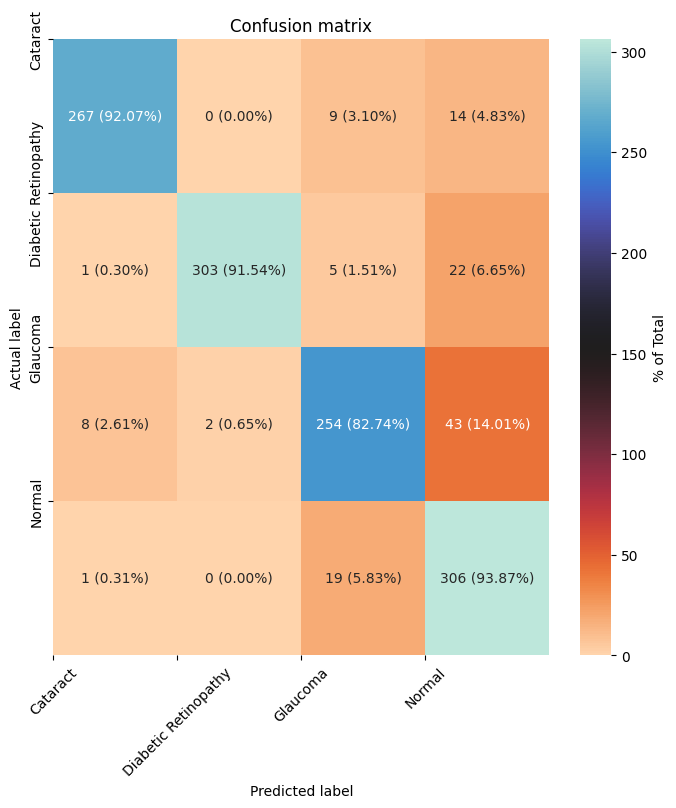

In [ ]:
# Fungsi untuk visualisasi confusion matrix
def plot_cm(label_matrix, predictions, class_names):
    preds = np.argmax(predictions, axis=1)
    labels_ = np.argmax(label_matrix, axis=1)
    cm = confusion_matrix(labels_, preds, labels=np.arange(len(class_names)))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            annot[i, j] = f'{cm[i, j]} ({cm_normalized[i, j]:.2f}%)'
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=annot, fmt="", cmap="icefire_r", cbar_kws={'label': '% of Total'})
    indices = np.arange(len(class_names))
    plt.xticks(indices, class_names, rotation=45)
    plt.yticks(indices, class_names)
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

class_names = ["Cataract", "Diabetic Retinopathy", "Glaucoma", "Normal"]
plot_cm(val_labels, test_predictions_baseline, class_names)